<a href="https://colab.research.google.com/github/Pritam-Mondal18/Machine-Learning-yt/blob/main/IPL_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IPL 2022 Capstone Project
### The Indian Premier League (IPL) is a professional T20 cricket league in India, featuring franchises representing cities. This project explores IPL 2022 match-level data to derive meaningful insights and understand match outcomes, player performances, and team dynamics.

### These are some of the important columns that we'll focus on for meaningful insights in this project.

### column names: Variable Type

### @) date : string
### @) venue : string
### @) stage : string
### @) team1 : string
### @) team2 : string
### @) toss_winner : string
### @) toss_decision : string
### @) first_ings_score : integer
### @) second_ings_score : integer
### @) match_winner : string
### @) won_by : string
### @) margin : integer
### @) player_of_the_match : string
### @) top_scorer : string
### @) highscore : integer
### @) best_bowling : string
### @) best_bowling_fgure : string
### @) gure : string

## Loading the Libraries and Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load data set
df = pd.read_csv('IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


## Basic Information

## Check the size of rows and columns of the dataset

In [5]:
print(f"Your ROWS are: {df.shape[0]} and Your COLUMNS are: {df.shape[1]}")

Your ROWS are: 74 and Your COLUMNS are: 20


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

## Now let's see how many columns have null values in total.

In [7]:
print(df.isnull().sum())

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64


# Now, Here comes some Basic Questions

In [8]:
print(df.columns)

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'margin', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')


## 1. Which team won the most matches?

Text(0, 0.5, 'Teams --->')

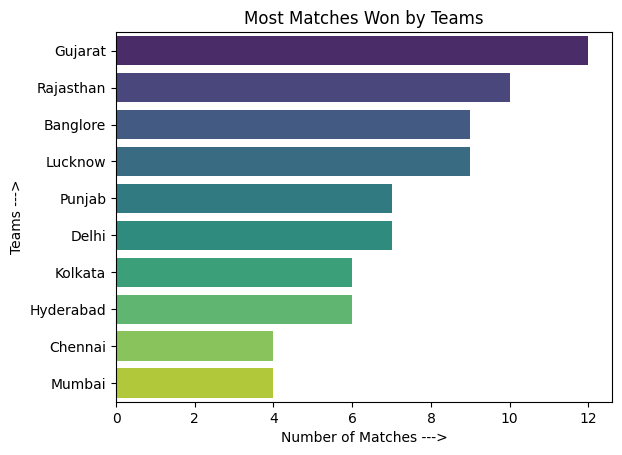

In [9]:
match_wins = df['match_winner'].value_counts()
sns.barplot(y=match_wins.index,x=match_wins.values,palette='viridis')
plt.title('Most Matches Won by Teams')
plt.xlabel('Number of Matches --->')
plt.ylabel('Teams --->')

## 2. Toss Decision Trends

In [10]:
df['toss_decision'].value_counts()

,count
toss_decision,
Field,59
Bat,15


Text(0, 0.5, 'Number of Times --->')

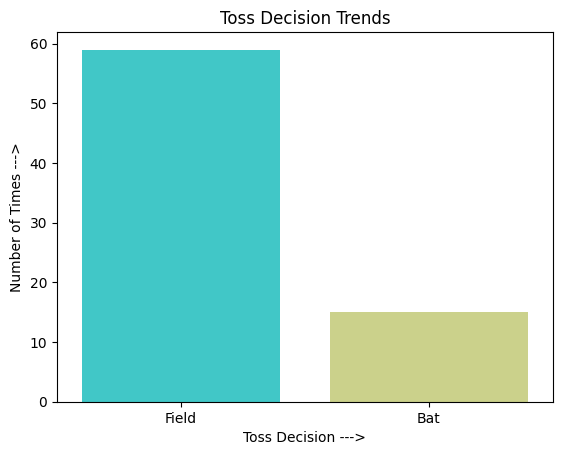

In [11]:
sns.countplot(x=df['toss_decision'],palette='rainbow')
plt.title('Toss Decision Trends')
plt.xlabel('Toss Decision --->')
plt.ylabel('Number of Times --->')

## 3. Toss Winner vs Match Winner

In [12]:
count = df[df['toss_winner']==df['match_winner']]['match_id'].count()
parcentage = (count*100)/df.shape[0]
parcentage.round(2)


np.float64(48.65)

## How do teams win? (Runs vs Wickets)

In [18]:
df.groupby('match_winner')['won_by'].value_counts()

match_winner  won_by 
Banglore      Runs       5
              Wickets    4
Chennai       Runs       3
              Wickets    1
Delhi         Wickets    4
              Runs       3
Gujarat       Wickets    8
              Runs       4
Hyderabad     Wickets    5
              Runs       1
Kolkata       Wickets    4
              Runs       2
Lucknow       Runs       7
              Wickets    2
Mumbai        Wickets    3
              Runs       1
Punjab        Runs       4
              Wickets    3
Rajasthan     Runs       7
              Wickets    3
Name: count, dtype: int64

Text(0, 0.5, 'Number of Times --->')

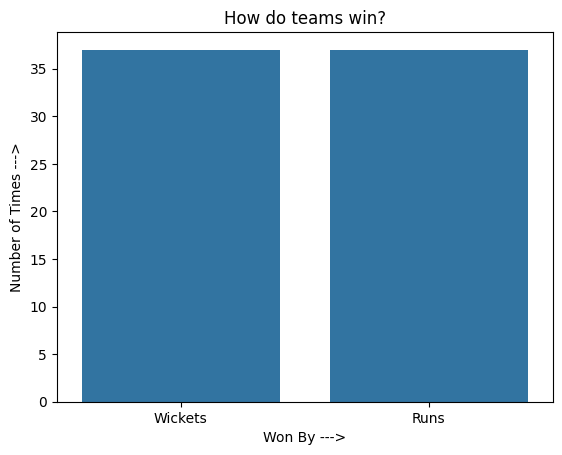

In [20]:
sns.countplot(x=df['won_by'])
plt.title('How do teams win?')
plt.xlabel('Won By --->')
plt.ylabel('Number of Times --->')

# Key Player Performances
## 1 Most "Player of the Match" Awards

In [34]:
count = df['player_of_the_match'].value_counts().head(10)
count

,count
player_of_the_match,
Kuldeep Yadav,4
Jos Buttler,3
Wanindu Hasaranga,2
Umesh Yadav,2
Quinton de Kock,2
Shubman Gill,2
Avesh Khan,2
Dinesh Karthik,2
Hardik Pandya,2


Text(0, 0.5, 'Players --->')

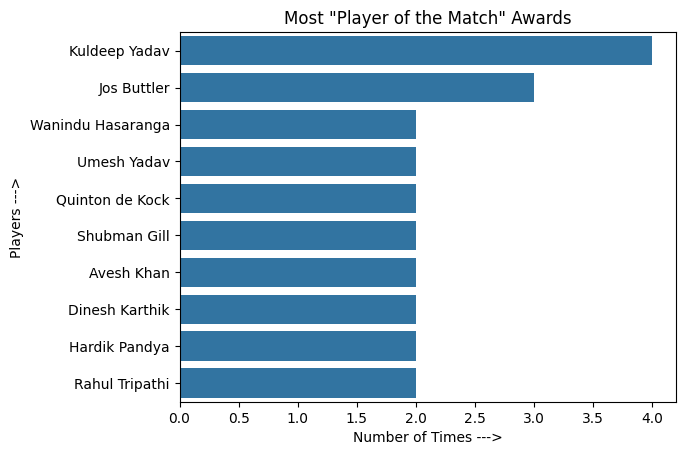

In [37]:
sns.barplot(y=count.index,x=count.values)
plt.title('Most "Player of the Match" Awards')
plt.xlabel('Number of Times --->')
plt.ylabel('Players --->')

## 2 Top Scorers

<Axes: ylabel='top_scorer'>

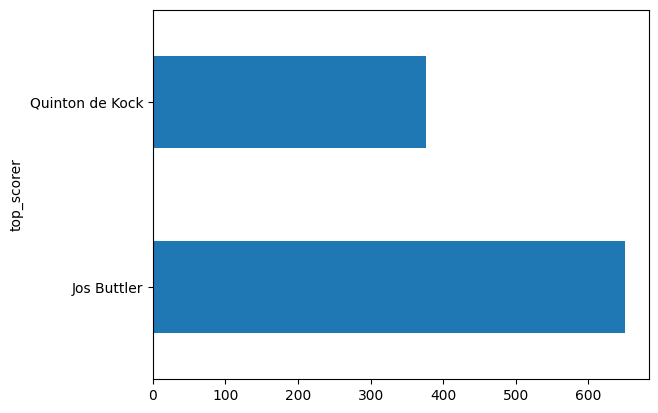

In [90]:
highscore_analysis = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
# sns.barplot(x=highscore_analysis.index,y=highscore_analysis.values)
highscore_analysis.plot(kind='barh')

## 10 Best Bowling Figures

<Axes: ylabel='best_bowling'>

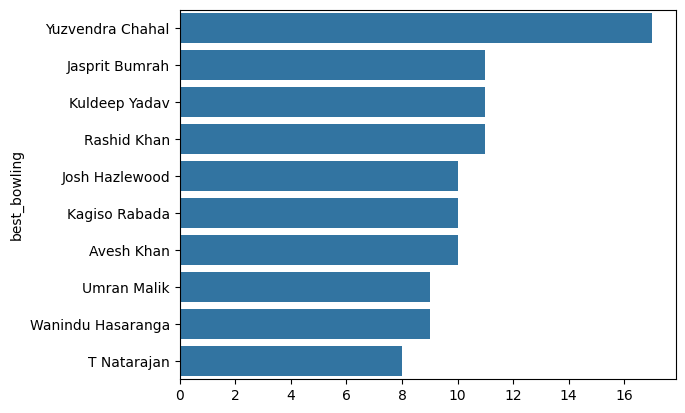

In [115]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x: x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)
Best_Bowling_Figures_analysis=df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
sns.barplot(y=Best_Bowling_Figures_analysis.index,x=Best_Bowling_Figures_analysis.values)
# Best_Bowling_Figures_analysis

# Venue Analysis
## Most Matches Played by Venue

Text(0, 0.5, 'Venue --->')

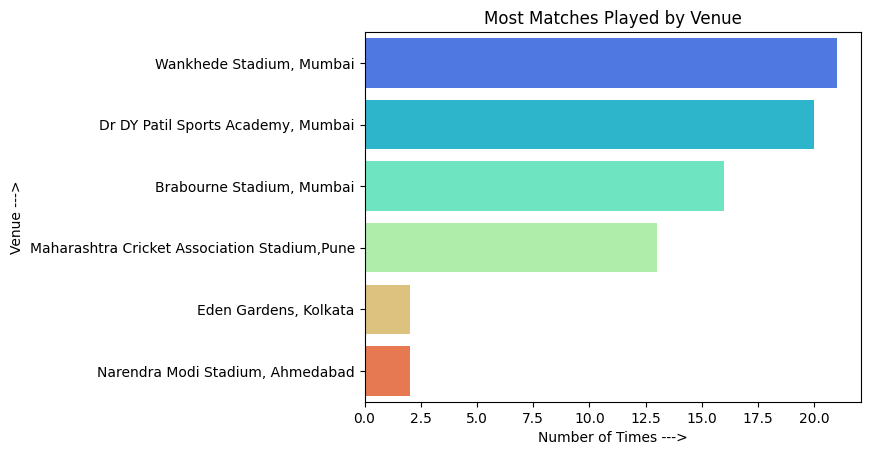

In [64]:
venue_count = df['venue'].value_counts()
sns.barplot(x=venue_count.values,y=venue_count.index,palette='rainbow')
plt.title("Most Matches Played by Venue")
plt.xlabel("Number of Times --->")
plt.ylabel("Venue --->")

#Custom Questions & Insights
## Q1: Who won the highest margin by runs?

In [120]:
df[df['won_by'] == 'Runs'].sort_values(by='margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


## Q2: Which player had the highest individual score?

In [128]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,3


In [140]:
df['highscore'].astype(int)

,highscore
0,0
1,0
2,0
3,0
4,0
...,...
69,0
70,0
71,0
72,0


In [141]:
df[df['highest_wickets'] == df['highest_wickets'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,True


In [142]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,False,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,False,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,False,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,False,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,False,Yuzvendra Chahal,3--22,3


## Q3: Which bowler had the best bowling figures?

In [147]:
# df[df['highest_wickets'].max()][['best_bowling','best_bowling_figure']]
df[df['highest_wickets'] == df['highest_wickets'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
